In [1]:
import os
os.chdir('..')


In [2]:

import nmrglue as ng
import numpy as np
from cops_analysis import cops_analyze
from cops_prediction import gaussian
from cops_prediction import int_seq_match
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering

In [3]:
%%time
b = cops_analyze(['./SHP2_Gradcops/SHP2_Grad1.ft3',
                  './SHP2_Gradcops/SHP2_Grad3.ft3',
                  './SHP2_Gradcops/SHP2_Grad5.ft3',
                  './SHP2_Gradcops/SHP2_Grad6.ft3'],
                 mode='HNCA', cop_num=[1,2,4,5], pyruvate_on=False)

#removed index 342: CA way too low!
tb = pd.read_csv('./dev/SHP2_processed.csv', sep='\t')
tb = tb.rename(columns={'w1':'HN','w2':'CA','w3':'N'})
tb = tb.drop([342])
tb.reindex()

#realign spectra
shifts_array = tb[['CA', 'N','HN']].to_numpy(dtype=np.float32)
shifts_array[:,[0,1]]=shifts_array[:,[1,0]]


CPU times: user 9.83 s, sys: 7.39 s, total: 17.2 s
Wall time: 17.2 s


In [4]:
shifts_array

array([[129.36499,  48.55583,   7.60125],
       [127.61668,  57.50206,   7.35108],
       [124.96531,  57.57096,   7.10819],
       ...,
       [121.28429,  53.74604,   7.98456],
       [121.10343,  55.27238,   8.48577],
       [120.91807,  55.76456,   8.14289]], dtype=float32)

In [5]:
#a = int_seq_match(b, cops_mode='HNCA')
a = int_seq_match(b, peak_table_dir = tb, cops_mode='HNCA')

1714
[131.79533  58.76523   8.39841]
CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 70.3 ms


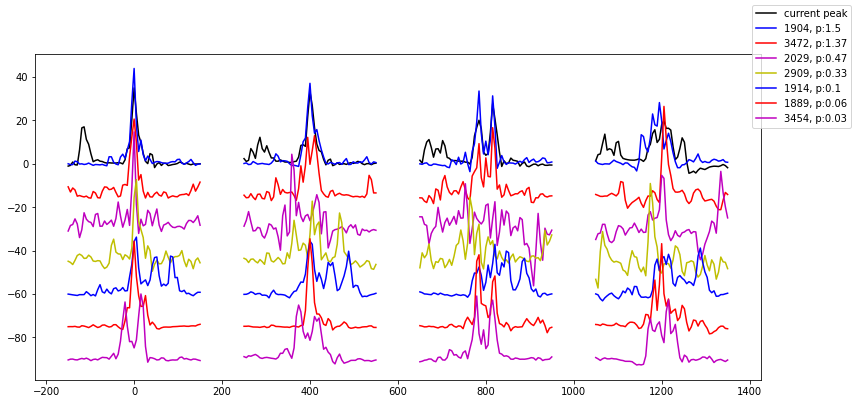

In [6]:
%%time
index = 14
print(tb['Assignment'][index])
print(shifts_array[index])
df, fig = a.find_best_matches(shifts_array[index], snr=25,gen_plot=True, verbose=False, sequential_mode=True)

In [7]:
df['peak']=df['peak'].astype(str)
print(df.to_numpy())

[['1904' 1.5]
 ['3472' 1.37]
 ['2029' 0.47]
 ['2909' 0.33]
 ['1914' 0.1]
 ['1889' 0.06]
 ['3454' 0.03]]


In [65]:
%%time
prediction = []
for ind, row in tb[~tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=True)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no sequential peak within CA range."])
        print(tb.loc[ind]['Assignment'])
        pass

tb.loc[~tb['is_sequential'], 'prediction'] = prediction

no peaks picked or read within CA range.
2003
no peaks picked or read within CA range.
2100
no peaks picked or read within CA range.
2334
no peaks picked or read within CA range.
2903
no peaks picked or read within CA range.
2931
no peaks picked or read within CA range.
3090
no peaks picked or read within CA range.
3105
no peaks picked or read within CA range.
3250
no peaks picked or read within CA range.
3341
no peaks picked or read within CA range.
3390
no peaks picked or read within CA range.
3515
no peaks picked or read within CA range.
3526
CPU times: user 875 ms, sys: 0 ns, total: 875 ms
Wall time: 872 ms


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [66]:
%%time
prediction = []
for ind, row in tb[tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=False)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no internal peak within CA range."])
        print(tb.loc[ind]['Assignment'])
        pass

tb.loc[tb['is_sequential'], 'prediction'] = prediction

1747
1847
2099
no peaks picked or read within CA range.
2155
no peaks picked or read within CA range.
2207
2579
2689
2914
2988
3052
3200
3611
CPU times: user 849 ms, sys: 3.06 ms, total: 852 ms
Wall time: 848 ms


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [83]:
tb['prediction'] = tb['prediction'].astype(str)
func = lambda e: e['prediction'].replace('\n', ',')
func2 = lambda e: e['prediction'].replace('\'', '')
tb['prediction'] = tb.apply(func, axis=1)
tb['prediction'] = tb.apply(func2, axis=1)                                         
tb.to_csv('./dev/shp2_plots/shp2_predictions.csv',sep='\t')

0                                          [[2355 1.03]]
1      [[3331 0.61], [2315 0.52], [2857 0.4], [3527 0...
2      [[1899 1.44], [2484 0.74], [3527 0.68], [1698 ...
3                                          [[2371 0.84]]
4      [[2047 1.22], [3301 0.96], [3426 0.49], [2331 ...
                             ...                        
741    [[2558 0.31], [3219 0.13], [3275 0.09], [3123 ...
742    [[2033 0.11], [2814 0.09], [2138 0.04], [3012 ...
743    [[3016 1.04], [3557 0.9], [3006 0.68], [2569 0...
744    [[3511 0.33], [2024 0.26], [2658 0.09], [2785 ...
745                  [no internal peak within CA range.]
Name: prediction, Length: 745, dtype: object
